Show basic stats for movement variables during courtship

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from aux import loadmat_h5
from disp import set_font_size, set_plot

cc = np.concatenate

DATA_FILE = 'data/simple/c_song_f_behav.csv'

In [2]:
df = pd.read_csv(DATA_FILE)

In [3]:
# split big df into dfs for individual trials
n_trial = np.max(df.ID) + 1
dfs_trial = [df[df.ID == i] for i in range(n_trial)]

# Autocovariances

In [8]:
import sys
from time_stats import xcov_multi_with_confidence

fps = 30.03
dt = 1/fps

lag_bak = int(round(30*fps))
lag_fwd = int(round(30*fps))

durs = np.array([len(df_trial) for df_trial in dfs_trial])*dt

$$C_i(\Delta t) = \frac{1}{T_i(\Delta t)-1} \sum_{t=1}^{T_i(\Delta t)} [(x_i(t) - \mu_{x_i(t)})(x_i(t+\Delta t) - \mu_{x_i(t+\Delta t)})]$$

$$C_i^*(\Delta t) = C_i(\Delta t) / C_i(0)$$

$$\textrm{Autocovariance}(\Delta t) = \sum_i C_i^*(\Delta t)\frac{T_i}{\sum_i T_i}$$

### FFV aggregated over trials

In [32]:
# two-point correlation func for FFV
cov_ffv, _, _, _ = xcov_multi_with_confidence(behav_all['FFV'], behav_all['FFV'], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)

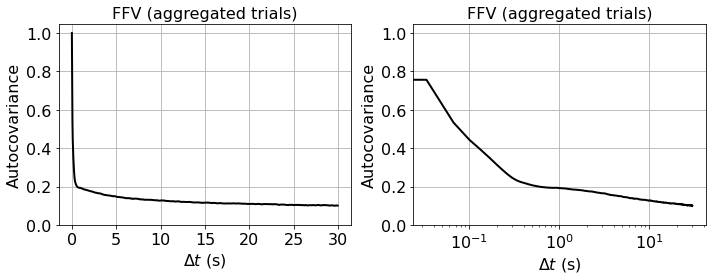

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov[t_cov >= 0], cov_ffv[t_cov >= 0], lw=2, c='k')
axs[1].semilogx(t_cov[t_cov >= 0], cov_ffv[t_cov >= 0], lw=2, c='k')

for ax in axs:
    ax.set_ylim(bottom=0)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FFV (aggregated trials)')
    ax.grid()
    
set_font_size(axs, 16)

### FFV averaged over trials

In [34]:
covs_ffv = []
for ffv in behav_all['FFV']:
    sys.stdout.write('.')
    cov_ffv, _, _, _ = xcov_multi_with_confidence([ffv], [ffv], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)
    covs_ffv.append(cov_ffv)
covs_ffv = np.array(covs_ffv)

....................................................................................................................................................................................................................................................................................

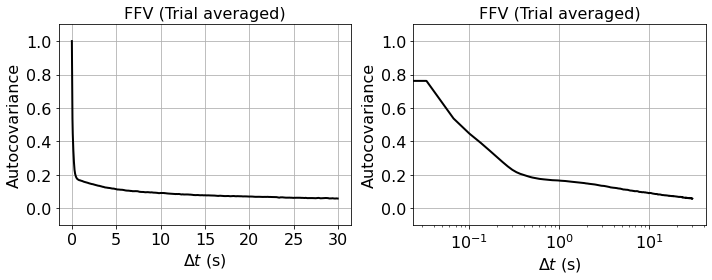

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

dur_mat = np.tile(durs[:, None], (1, covs_ffv.shape[1]))
dur_mat[np.isnan(covs_ffv)] = np.nan
weight_mat = dur_mat / np.nansum(dur_mat, 0)

covs_ffv_mean = np.nansum(covs_ffv*weight_mat, axis=0)

t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov[t_cov >= 0], covs_ffv_mean[t_cov >= 0], lw=2, c='k')
axs[1].semilogx(t_cov[t_cov >= 0], covs_ffv_mean[t_cov >= 0], lw=2, c='k')

for ax in axs:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FFV (Trial averaged)')
    ax.grid()
    
set_font_size(axs, 16)

### FLS aggregated over trials

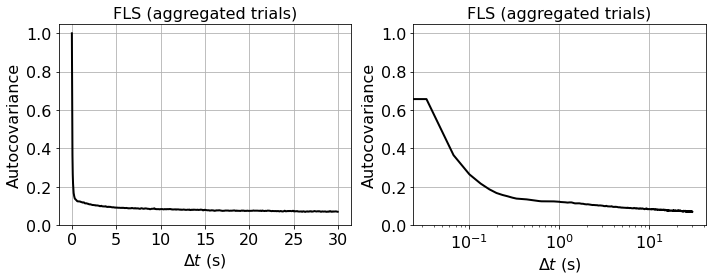

In [36]:
# two-point correlation func for FLS
cov_fls, _, _, _ = xcov_multi_with_confidence(behav_all['FLS'], behav_all['FLS'], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov[t_cov >= 0], cov_fls[t_cov >= 0], lw=2, c='k')
axs[1].semilogx(t_cov[t_cov >= 0], cov_fls[t_cov >= 0], lw=2, c='k')

for ax in axs:
    ax.set_ylim(bottom=0)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FLS (aggregated trials)')
    ax.grid()
    
set_font_size(axs, 16)

### FLS averaged over trials

In [37]:
covs_fls = []
for fls in behav_all['FLS']:
    sys.stdout.write('.')
    cov_fls, _, _, _ = xcov_multi_with_confidence([fls], [fls], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)
    covs_fls.append(cov_fls)
covs_fls = np.array(covs_fls)

....................................................................................................................................................................................................................................................................................

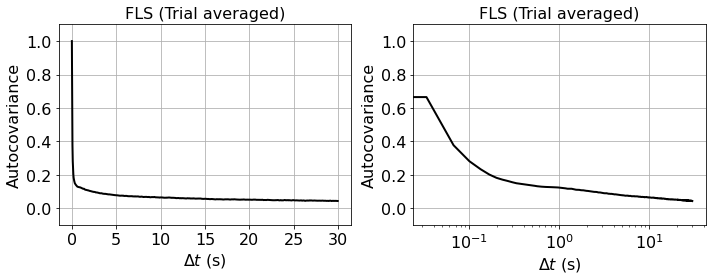

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

dur_mat = np.tile(durs[:, None], (1, covs_fls.shape[1]))
dur_mat[np.isnan(covs_fls)] = np.nan
weight_mat = dur_mat / np.nansum(dur_mat, 0)

covs_fls_mean = np.nansum(covs_fls*weight_mat, axis=0)

t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov[t_cov >= 0], covs_fls_mean[t_cov >= 0], lw=2, c='k')
axs[1].semilogx(t_cov[t_cov >= 0], covs_fls_mean[t_cov >= 0], lw=2, c='k')

for ax in axs:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FLS (Trial averaged)')
    ax.grid()
    
set_font_size(axs, 16)

### FRS aggregated over trials

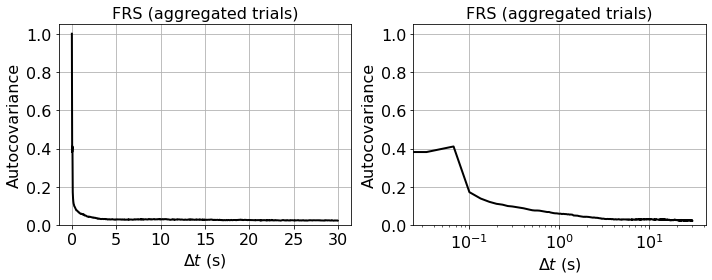

In [39]:
# two-point correlation func for FRS
cov_frs, _, _, _ = xcov_multi_with_confidence(behav_all['FRS'], behav_all['FRS'], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov[t_cov >= 0], cov_frs[t_cov >= 0], lw=2, c='k')
axs[1].semilogx(t_cov[t_cov >= 0], cov_frs[t_cov >= 0], lw=2, c='k')

for ax in axs:
    ax.set_ylim(bottom=0)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FRS (aggregated trials)')
    ax.grid()
    
set_font_size(axs, 16)

### FRS averaged over trials

In [40]:
covs_frs = []
for frs in behav_all['FRS']:
    sys.stdout.write('.')
    cov_frs, _, _, _ = xcov_multi_with_confidence([frs], [frs], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)
    covs_frs.append(cov_frs)
covs_frs = np.array(covs_frs)

....................................................................................................................................................................................................................................................................................

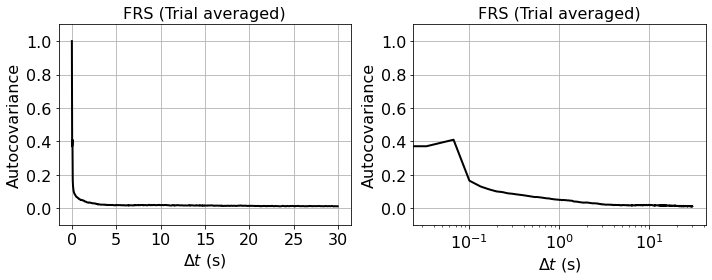

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

dur_mat = np.tile(durs[:, None], (1, covs_frs.shape[1]))
dur_mat[np.isnan(covs_frs)] = np.nan
weight_mat = dur_mat / np.nansum(dur_mat, 0)

covs_frs_mean = np.nansum(covs_frs*weight_mat, axis=0)

t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov[t_cov >= 0], covs_frs_mean[t_cov >= 0], lw=2, c='k')
axs[1].semilogx(t_cov[t_cov >= 0], covs_frs_mean[t_cov >= 0], lw=2, c='k')

for ax in axs:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FRS (Trial averaged)')
    ax.grid()
    
set_font_size(axs, 16)

# Cross-covariances

### FFV vs FLS aggregated over trials

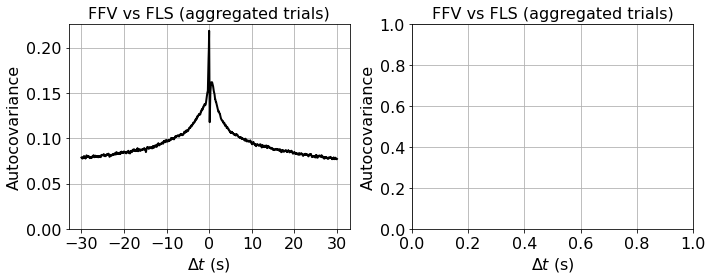

In [9]:
cov_ffv_fls, _, _, _ = xcov_multi_with_confidence(behav_all['FFV'], behav_all['FLS'], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov, cov_ffv_fls, lw=2, c='k')

for ax in axs:
    ax.set_ylim(bottom=0)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FFV vs FLS (aggregated trials)')
    ax.grid()
    
set_font_size(axs, 16)

### FFV vs FLS averaged over trials

In [10]:
covs_ffv_fls = []
for ffv, fls in zip(behav_all['FFV'], behav_all['FLS']):
    sys.stdout.write('.')
    cov_ffv_fls, _, _, _ = xcov_multi_with_confidence([ffv], [fls], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)
    covs_ffv_fls.append(cov_ffv_fls)
covs_ffv_fls = np.array(covs_ffv_fls)

....................................................................................................................................................................................................................................................................................

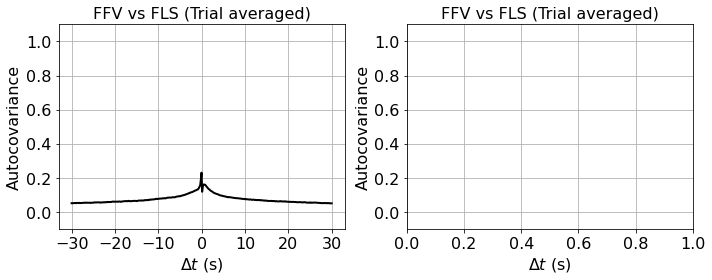

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

dur_mat = np.tile(durs[:, None], (1, covs_ffv_fls.shape[1]))
dur_mat[np.isnan(covs_ffv_fls)] = np.nan
weight_mat = dur_mat / np.nansum(dur_mat, 0)

covs_ffv_fls_mean = np.nansum(covs_ffv_fls*weight_mat, axis=0)

t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov, covs_ffv_fls_mean, lw=2, c='k')

for ax in axs:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FFV vs FLS (Trial averaged)')
    ax.grid()
    
set_font_size(axs, 16)

### FFV vs FRS aggregated over trials

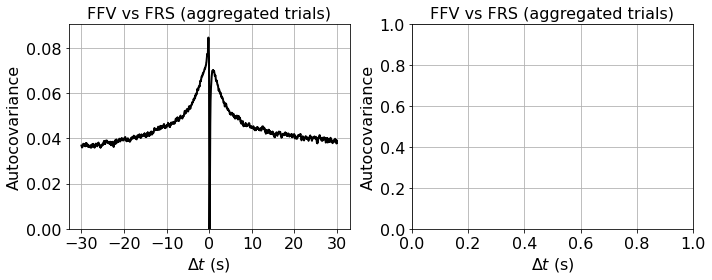

In [12]:
cov_ffv_frs, _, _, _ = xcov_multi_with_confidence(behav_all['FFV'], behav_all['FRS'], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov, cov_ffv_frs, lw=2, c='k')

for ax in axs:
    ax.set_ylim(bottom=0)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FFV vs FRS (aggregated trials)')
    ax.grid()
    
set_font_size(axs, 16)

### FFV vs FRS averaged over trials

In [13]:
covs_ffv_frs = []
for ffv, frs in zip(behav_all['FFV'], behav_all['FRS']):
    sys.stdout.write('.')
    cov_ffv_frs, _, _, _ = xcov_multi_with_confidence([ffv], [frs], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)
    covs_ffv_frs.append(cov_ffv_frs)
covs_ffv_frs = np.array(covs_ffv_frs)

....................................................................................................................................................................................................................................................................................

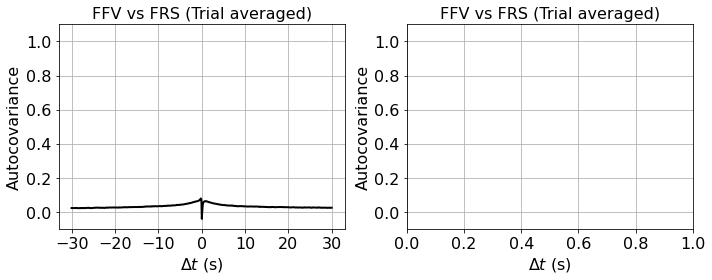

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

dur_mat = np.tile(durs[:, None], (1, covs_ffv_frs.shape[1]))
dur_mat[np.isnan(covs_ffv_frs)] = np.nan
weight_mat = dur_mat / np.nansum(dur_mat, 0)

covs_ffv_frs_mean = np.nansum(covs_ffv_frs*weight_mat, axis=0)

t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov, covs_ffv_frs_mean, lw=2, c='k')

for ax in axs:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FFV vs FRS (Trial averaged)')
    ax.grid()
    
set_font_size(axs, 16)

### FLS vs FRS aggregated over trials

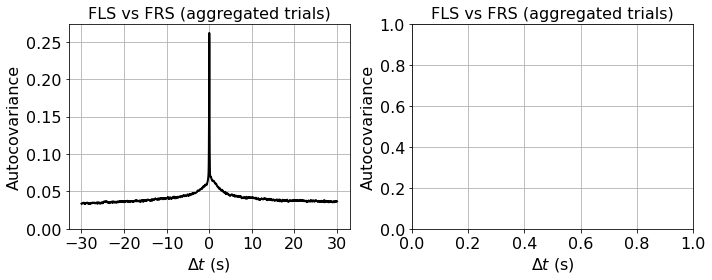

In [15]:
cov_fls_frs, _, _, _ = xcov_multi_with_confidence(behav_all['FLS'], behav_all['FRS'], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)
t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov, cov_fls_frs, lw=2, c='k')

for ax in axs:
    ax.set_ylim(bottom=0)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FLS vs FRS (aggregated trials)')
    ax.grid()
    
set_font_size(axs, 16)

### FLS vs FRS averaged over trials

In [16]:
covs_fls_frs = []
for fls, frs in zip(behav_all['FLS'], behav_all['FRS']):
    sys.stdout.write('.')
    cov_fls_frs, _, _, _ = xcov_multi_with_confidence([fls], [frs], lag_backward=lag_bak, lag_forward=lag_fwd, pre_norm=False, scale=True)
    covs_fls_frs.append(cov_fls_frs)
covs_fls_frs = np.array(covs_fls_frs)

....................................................................................................................................................................................................................................................................................

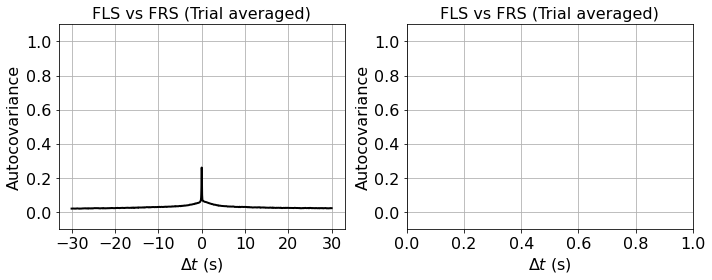

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

dur_mat = np.tile(durs[:, None], (1, covs_fls_frs.shape[1]))
dur_mat[np.isnan(covs_fls_frs)] = np.nan
weight_mat = dur_mat / np.nansum(dur_mat, 0)

covs_fls_frs_mean = np.nansum(covs_fls_frs*weight_mat, axis=0)

t_cov = np.arange(-lag_bak, lag_fwd) * dt

axs[0].plot(t_cov, covs_fls_frs_mean, lw=2, c='k')

for ax in axs:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlabel('$\Delta t$ (s)')
    ax.set_ylabel('Autocovariance')
    ax.set_title('FLS vs FRS (Trial averaged)')
    ax.grid()
    
set_font_size(axs, 16)